# Prescriber and drug detail


In this dataset there is an information about number of different drugs prescribed.The sum of the number of prescriptions.The sum of the number of days prescribed.The sum of the total cost.
The variance of these three sums quantities.
The maximum of these three sums quantities
The Prescribing pattern features to figure out the prescribe-related fraud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data=pd.read_csv("./datasets/PartD_Prescriber_PUF_NPI_Drug_17.txt", sep='\t')

In [3]:
data

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,NaN,...,13.0,390,59.21,NaN,*,NaN,*,NaN,NaN,NaN
1,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,11.0,...,27.0,765,259.48,NaN,#,NaN,#,NaN,NaN,NaN
2,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,CEPHALEXIN,CEPHALEXIN,17.0,...,17.0,123,98.99,NaN,#,NaN,#,NaN,NaN,NaN
3,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,11.0,...,12.0,95,120.43,NaN,*,NaN,*,NaN,NaN,NaN
4,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,17.0,...,17.0,105,300.76,NaN,#,NaN,#,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25209125,1992999882,RUDZINSKI-WALTER,MARISSA,WILKES BARRE,PA,Physician Assistant,S,CLONAZEPAM,CLONAZEPAM,NaN,...,13.0,335,103.74,NaN,*,NaN,*,NaN,NaN,NaN
25209126,1992999882,RUDZINSKI-WALTER,MARISSA,WILKES BARRE,PA,Physician Assistant,S,FLUOXETINE HCL,FLUOXETINE HCL,NaN,...,18.0,536,120.76,NaN,*,NaN,*,NaN,NaN,NaN
25209127,1992999882,RUDZINSKI-WALTER,MARISSA,WILKES BARRE,PA,Physician Assistant,S,RISPERIDONE,RISPERIDONE,NaN,...,12.0,356,91.96,NaN,*,NaN,*,NaN,NaN,NaN
25209128,1992999882,RUDZINSKI-WALTER,MARISSA,WILKES BARRE,PA,Physician Assistant,S,SERTRALINE HCL,SERTRALINE HCL,NaN,...,18.0,515,102.30,0.0,NaN,0.0,NaN,0.0,0.0,0.0


In [4]:
data.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_city', 'nppes_provider_state', 'specialty_description',
       'description_flag', 'drug_name', 'generic_name', 'bene_count',
       'total_claim_count', 'total_30_day_fill_count', 'total_day_supply',
       'total_drug_cost', 'bene_count_ge65', 'bene_count_ge65_suppress_flag',
       'total_claim_count_ge65', 'ge65_suppress_flag',
       'total_30_day_fill_count_ge65', 'total_day_supply_ge65',
       'total_drug_cost_ge65'],
      dtype='object')

In [5]:
data=data[['npi','nppes_provider_city','nppes_provider_state', 
                                               'nppes_provider_last_org_name', 
                                               'nppes_provider_first_name', 
                                               'specialty_description',
                                                'drug_name', 'generic_name',
                                                'total_drug_cost',
                                               'total_claim_count',
                                               'total_day_supply']]

In [6]:
data=data.rename(columns={'npi':'NPI','nppes_provider_first_name':'first_name', 'nppes_provider_last_org_name':'last_name',
             'nppes_provider_city':'city','nppes_provider_state':'state'})

In [7]:
data

,NPI,city,state,last_name,first_name,specialty_description,drug_name,generic_name,total_drug_cost,total_claim_count,total_day_supply
0,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN,Internal Medicine,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,59.21,13,390
1,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN,Internal Medicine,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,259.48,27,765
2,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN,Internal Medicine,CEPHALEXIN,CEPHALEXIN,98.99,17,123
3,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN,Internal Medicine,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,120.43,12,95
4,1003000126,CUMBERLAND,MD,ENKESHAFI,ARDALAN,Internal Medicine,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,300.76,17,105
...,...,...,...,...,...,...,...,...,...,...,...
25209125,1992999882,WILKES BARRE,PA,RUDZINSKI-WALTER,MARISSA,Physician Assistant,CLONAZEPAM,CLONAZEPAM,103.74,13,335
25209126,1992999882,WILKES BARRE,PA,RUDZINSKI-WALTER,MARISSA,Physician Assistant,FLUOXETINE HCL,FLUOXETINE HCL,120.76,18,536
25209127,1992999882,WILKES BARRE,PA,RUDZINSKI-WALTER,MARISSA,Physician Assistant,RISPERIDONE,RISPERIDONE,91.96,12,356
25209128,1992999882,WILKES BARRE,PA,RUDZINSKI-WALTER,MARISSA,Physician Assistant,SERTRALINE HCL,SERTRALINE HCL,102.30,18,515


In [10]:
data["Name"]=data["first_name"]+" "+data["last_name"]

In [11]:
# all npi over here is unique
data["NPI"].nunique()

918009

In [12]:
data.shape

(25209130, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209130 entries, 0 to 25209129
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   NPI                    int64  
 1   city                   object 
 2   state                  object 
 3   last_name              object 
 4   first_name             object 
 5   specialty_description  object 
 6   drug_name              object 
 7   generic_name           object 
 8   total_drug_cost        float64
 9   total_claim_count      int64  
 10  total_day_supply       int64  
 11  Name                   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 2.3+ GB


In [14]:
data.isnull().sum()


NPI                        0
city                       0
state                      0
last_name                471
first_name               351
specialty_description      0
drug_name                  0
generic_name               0
total_drug_cost            0
total_claim_count          0
total_day_supply           0
Name                     822
dtype: int64

In [15]:
data=data.fillna("Unknown")

In [16]:
data["last_name"].nunique()

224649

In [18]:
data=data.drop(columns=["first_name","last_name"])

In [19]:
data.columns

Index(['NPI', 'city', 'state', 'specialty_description', 'drug_name',
       'generic_name', 'total_drug_cost', 'total_claim_count',
       'total_day_supply', 'Name'],
      dtype='object')

In [20]:
data=data[['NPI', 'Name','city', 'state', 'specialty_description', 'drug_name',
       'generic_name', 'total_drug_cost', 'total_claim_count',
       'total_day_supply']]

In [21]:
data.isnull().sum()

NPI                      0
Name                     0
city                     0
state                    0
specialty_description    0
drug_name                0
generic_name             0
total_drug_cost          0
total_claim_count        0
total_day_supply         0
dtype: int64

In [22]:
cat_data=data[["NPI","Name","city","state","specialty_description"]]

In [23]:
num_data=data[["NPI","total_drug_cost","total_claim_count","total_day_supply"]]

In [24]:
cat_data

,NPI,Name,city,state,specialty_description
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine
1,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine
2,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine
3,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine
4,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine
...,...,...,...,...,...
25209125,1992999882,MARISSA RUDZINSKI-WALTER,WILKES BARRE,PA,Physician Assistant
25209126,1992999882,MARISSA RUDZINSKI-WALTER,WILKES BARRE,PA,Physician Assistant
25209127,1992999882,MARISSA RUDZINSKI-WALTER,WILKES BARRE,PA,Physician Assistant
25209128,1992999882,MARISSA RUDZINSKI-WALTER,WILKES BARRE,PA,Physician Assistant


In [25]:
cat_data=cat_data.drop_duplicates()


In [26]:
cat_data

,NPI,Name,city,state,specialty_description
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine
16,1003000142,RASHID KHALIL,TOLEDO,OH,Anesthesiology
38,1003000167,JULIO ESCOBAR,DAYTON,NV,Dentist
40,1003000282,ROSIE BLAKEMORE,NASHVILLE,TN,Nurse Practitioner
42,1003000407,DAVID GIRARDI,BROOKVILLE,PA,Family Practice
...,...,...,...,...,...
25209081,1992999759,DINO SORIANO,GUYTON,GA,Nurse Practitioner
25209110,1992999791,SHELIA THOMAS,MEMPHIS,TN,Registered Nurse
25209113,1992999825,GEOFFREY DESCHENES,SEATTLE,WA,Otolaryngology
25209121,1992999833,L. NOAH SHAW,NEW YORK,NY,Psychoanalyst


In [27]:
num_data

,NPI,total_drug_cost,total_claim_count,total_day_supply
0,1003000126,59.21,13,390
1,1003000126,259.48,27,765
2,1003000126,98.99,17,123
3,1003000126,120.43,12,95
4,1003000126,300.76,17,105
...,...,...,...,...
25209125,1992999882,103.74,13,335
25209126,1992999882,120.76,18,536
25209127,1992999882,91.96,12,356
25209128,1992999882,102.30,18,515


In [28]:
num_data=num_data.groupby("NPI").sum()

In [29]:
num_data=num_data.reset_index()

In [30]:
data=pd.merge(cat_data,num_data,on="NPI")

In [31]:
data

,NPI,Name,city,state,specialty_description,total_drug_cost,total_claim_count,total_day_supply
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,12374.60,385,8053
1,1003000142,RASHID KHALIL,TOLEDO,OH,Anesthesiology,113868.77,1846,55569
2,1003000167,JULIO ESCOBAR,DAYTON,NV,Dentist,151.75,38,157
3,1003000282,ROSIE BLAKEMORE,NASHVILLE,TN,Nurse Practitioner,659.99,54,1472
4,1003000407,DAVID GIRARDI,BROOKVILLE,PA,Family Practice,73501.23,2286,41901
...,...,...,...,...,...,...,...,...
918004,1992999759,DINO SORIANO,GUYTON,GA,Nurse Practitioner,15881.82,573,25573
918005,1992999791,SHELIA THOMAS,MEMPHIS,TN,Registered Nurse,1362.33,70,2070
918006,1992999825,GEOFFREY DESCHENES,SEATTLE,WA,Otolaryngology,3378.47,167,3746
918007,1992999833,L. NOAH SHAW,NEW YORK,NY,Psychoanalyst,305.81,35,1050


In [51]:
# data.plot(x="NPI",y="total_drug_cost",kind="scatter")

In [32]:
data["specialty_description"].unique()

array(['Internal Medicine', 'Anesthesiology', 'Dentist',
       'Nurse Practitioner', 'Family Practice', 'Obstetrics & Gynecology',
       'Urology', 'Dermatology', 'Physical Medicine and Rehabilitation',
       'Radiation Oncology', 'Physician Assistant', 'Infectious Disease',
       'Orthopedic Surgery', 'Endocrinology', 'Psychiatry',
       'Rheumatology', 'General Practice', 'Neurology', 'Nephrology',
       'Preventive Medicine', 'Orthopaedic Surgery', 'Ophthalmology',
       'Pulmonary Disease', 'Otolaryngology',
       'Plastic and Reconstructive Surgery', 'Cardiology',
       'Emergency Medicine', 'Interventional Cardiology',
       'Gastroenterology', 'General Surgery', 'Diagnostic Radiology',
       'Geriatric Medicine', 'Psychiatry & Neurology', 'Neurosurgery',
       'Interventional Radiology', 'Neuropsychiatry', 'Pain Management',
       'Oral Surgery (Dentist only)', 'Podiatry', 'Pediatric Medicine',
       'Optometry', 'Hematology-Oncology', 'Certified Nurse Midwife',
  

In [33]:
specialty=data['specialty_description'].value_counts().sort_values(ascending=False)

In [34]:
specialty[:20]

Nurse Practitioner                                                122369
Internal Medicine                                                 106603
Dentist                                                           100805
Family Practice                                                    99899
Physician Assistant                                                74443
Emergency Medicine                                                 35797
Obstetrics & Gynecology                                            23717
Psychiatry                                                         22864
Student in an Organized Health Care Education/Training Program     22728
Optometry                                                          22084
Cardiology                                                         19619
Orthopedic Surgery                                                 19227
Ophthalmology                                                      18452
General Surgery                                    

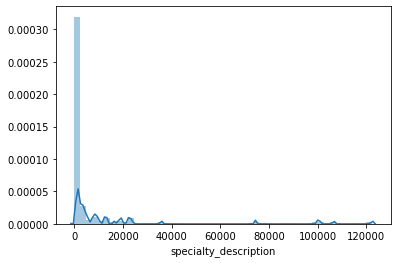

In [35]:
sns.distplot(specialty)

In [94]:
data_1=pd.read_csv("./datasets/opiod.csv",index_col=0)

/Users/umangimistry/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [95]:
df=pd.merge(data,data_1,on="NPI")

In [96]:
df

,NPI,Name,city,state,specialty_description,total_drug_cost,total_claim_count,total_day_supply,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,12374.60,385,8053,25.0,3.69,0.0,0.00
1,1003000142,RASHID KHALIL,TOLEDO,OH,Anesthesiology,113868.77,1846,55569,1040.0,53.44,200.0,19.23
2,1003000167,JULIO ESCOBAR,DAYTON,NV,Dentist,151.75,38,157,14.0,25.45,0.0,0.00
3,1003000282,ROSIE BLAKEMORE,NASHVILLE,TN,Nurse Practitioner,659.99,54,1472,0.0,0.00,0.0,0.00
4,1003000407,DAVID GIRARDI,BROOKVILLE,PA,Family Practice,73501.23,2286,41901,32.0,1.15,15.0,46.88
...,...,...,...,...,...,...,...,...,...,...,...,...
918004,1992999759,DINO SORIANO,GUYTON,GA,Nurse Practitioner,15881.82,573,25573,0.0,0.00,0.0,0.00
918005,1992999791,SHELIA THOMAS,MEMPHIS,TN,Registered Nurse,1362.33,70,2070,65.0,36.31,0.0,0.00
918006,1992999825,GEOFFREY DESCHENES,SEATTLE,WA,Otolaryngology,3378.47,167,3746,27.0,10.00,0.0,0.00
918007,1992999833,L. NOAH SHAW,NEW YORK,NY,Psychoanalyst,305.81,35,1050,0.0,0.00,0.0,0.00


In [97]:
df=df.drop_duplicates()

In [98]:
df

,NPI,Name,city,state,specialty_description,total_drug_cost,total_claim_count,total_day_supply,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,12374.60,385,8053,25.0,3.69,0.0,0.00
1,1003000142,RASHID KHALIL,TOLEDO,OH,Anesthesiology,113868.77,1846,55569,1040.0,53.44,200.0,19.23
2,1003000167,JULIO ESCOBAR,DAYTON,NV,Dentist,151.75,38,157,14.0,25.45,0.0,0.00
3,1003000282,ROSIE BLAKEMORE,NASHVILLE,TN,Nurse Practitioner,659.99,54,1472,0.0,0.00,0.0,0.00
4,1003000407,DAVID GIRARDI,BROOKVILLE,PA,Family Practice,73501.23,2286,41901,32.0,1.15,15.0,46.88
...,...,...,...,...,...,...,...,...,...,...,...,...
918004,1992999759,DINO SORIANO,GUYTON,GA,Nurse Practitioner,15881.82,573,25573,0.0,0.00,0.0,0.00
918005,1992999791,SHELIA THOMAS,MEMPHIS,TN,Registered Nurse,1362.33,70,2070,65.0,36.31,0.0,0.00
918006,1992999825,GEOFFREY DESCHENES,SEATTLE,WA,Otolaryngology,3378.47,167,3746,27.0,10.00,0.0,0.00
918007,1992999833,L. NOAH SHAW,NEW YORK,NY,Psychoanalyst,305.81,35,1050,0.0,0.00,0.0,0.00


In [99]:
payment=pd.read_csv("./datasets/payment.csv",index_col=0)

In [100]:
payment

,Name,Total_Payment_Sum
0,01SOHEIR AZER,12.64
1,A AKBAR,366.07
2,A ALBALA,112622.87
3,A ALICEA,362.77
4,A AMINIAN,4690.72
...,...,...
546473,ZYGMUNT ORZECHOWSKI,19.34
546474,ZYLKIA RODRIGUEZ,238.55
546475,ZYNIA PUA-VINES,104.33
546476,ZYNNIA ZAFRA,923.82


In [101]:
df1 = pd.merge (df,payment, on = 'Name')

In [102]:
df1

,NPI,Name,city,state,specialty_description,total_drug_cost,total_claim_count,total_day_supply,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate,Total_Payment_Sum
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,12374.60,385,8053,25.0,3.69,0.0,0.00,25.51
1,1003000142,RASHID KHALIL,TOLEDO,OH,Anesthesiology,113868.77,1846,55569,1040.0,53.44,200.0,19.23,1979.06
2,1003000167,JULIO ESCOBAR,DAYTON,NV,Dentist,151.75,38,157,14.0,25.45,0.0,0.00,127.16
3,1003000407,DAVID GIRARDI,BROOKVILLE,PA,Family Practice,73501.23,2286,41901,32.0,1.15,15.0,46.88,1052.15
4,1558452516,DAVID GIRARDI,SYRACUSE,NY,Optometry,18165.20,125,7499,0.0,0.00,0.0,0.00,1052.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
503243,1992998645,SESHASREE MARUPUDI,SHENANDOAH,TX,Internal Medicine,301500.40,5215,337688,188.0,3.20,0.0,0.00,289.21
503244,1992999031,RAHUL NAIK,LOS ANGELES,CA,Hematology-Oncology,2317795.96,1453,50619,151.0,8.59,22.0,14.57,30292.16
503245,1992999551,INDIRA MOLAI,ESCONDIDO,CA,Internal Medicine,146862.58,3004,191551,187.0,5.11,0.0,0.00,184.47
503246,1992999569,JENNY YUEN,SAN FRANCISCO,CA,Optometry,9560.76,42,1371,0.0,0.00,0.0,0.00,39.75


In [103]:
df1.columns

Index(['NPI', 'Name', 'city', 'state', 'specialty_description',
       'total_drug_cost', 'total_claim_count', 'total_day_supply',
       'Opioid Claim Count', 'Opioid Prescribing Rate',
       'Long-Acting Opioid Claim Count', 'Long-Acting Opioid Prescribing Rate',
       'Total_Payment_Sum'],
      dtype='object')

In [104]:
df1["NPI"].nunique()

503248

In [105]:
df1

,NPI,Name,city,state,specialty_description,total_drug_cost,total_claim_count,total_day_supply,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate,Total_Payment_Sum
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,12374.60,385,8053,25.0,3.69,0.0,0.00,25.51
1,1003000142,RASHID KHALIL,TOLEDO,OH,Anesthesiology,113868.77,1846,55569,1040.0,53.44,200.0,19.23,1979.06
2,1003000167,JULIO ESCOBAR,DAYTON,NV,Dentist,151.75,38,157,14.0,25.45,0.0,0.00,127.16
3,1003000407,DAVID GIRARDI,BROOKVILLE,PA,Family Practice,73501.23,2286,41901,32.0,1.15,15.0,46.88,1052.15
4,1558452516,DAVID GIRARDI,SYRACUSE,NY,Optometry,18165.20,125,7499,0.0,0.00,0.0,0.00,1052.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
503243,1992998645,SESHASREE MARUPUDI,SHENANDOAH,TX,Internal Medicine,301500.40,5215,337688,188.0,3.20,0.0,0.00,289.21
503244,1992999031,RAHUL NAIK,LOS ANGELES,CA,Hematology-Oncology,2317795.96,1453,50619,151.0,8.59,22.0,14.57,30292.16
503245,1992999551,INDIRA MOLAI,ESCONDIDO,CA,Internal Medicine,146862.58,3004,191551,187.0,5.11,0.0,0.00,184.47
503246,1992999569,JENNY YUEN,SAN FRANCISCO,CA,Optometry,9560.76,42,1371,0.0,0.00,0.0,0.00,39.75


In [106]:
df4=pd.read_csv("./datasets/supplier1_data.csv")

In [107]:
df4

,NPI,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount
0,1003000126,2,11,32.0,214,405.929470,95.977478,70.156976,64.189152
1,1003000407,1,2,0.0,12,28.000000,4.972500,3.900000,3.597500
2,1003000480,1,5,0.0,12,760.480000,75.624167,59.286667,55.340000
3,1003000522,1,29,43.0,109,245.186143,92.320000,67.667474,62.203188
4,1003000530,1,18,13.0,57,321.070179,207.290000,141.572076,141.572076
...,...,...,...,...,...,...,...,...,...
293798,1992998645,4,40,11.0,195,788.486078,208.440869,147.029627,146.017574
293799,1992999122,5,102,228.0,803,1499.742931,414.684936,307.830830,282.686290
293800,1992999551,3,12,0.0,75,737.268205,126.905652,96.511293,96.860424
293801,1992999759,1,3,0.0,41,28.281905,4.739286,3.401429,3.241429


In [108]:
df=pd.merge(df1,df4,on="NPI")

In [109]:
df

,NPI,Name,city,state,specialty_description,total_drug_cost,total_claim_count,total_day_supply,Opioid Claim Count,Opioid Prescribing Rate,...,Long-Acting Opioid Prescribing Rate,Total_Payment_Sum,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,12374.60,385,8053,25.0,3.69,...,0.00,25.51,2,11,32.0,214,405.929470,95.977478,70.156976,64.189152
1,1003000407,DAVID GIRARDI,BROOKVILLE,PA,Family Practice,73501.23,2286,41901,32.0,1.15,...,46.88,1052.15,1,2,0.0,12,28.000000,4.972500,3.900000,3.597500
2,1003000522,FREDERICK WEIGAND,DELTONA,FL,Family Practice,148671.74,4369,301669,128.0,2.57,...,0.00,436.34,1,29,43.0,109,245.186143,92.320000,67.667474,62.203188
3,1003000597,DAE KIM,TULSA,OK,Urology,62041.35,689,28338,92.0,11.93,...,0.00,2406.56,0,3,0.0,14,16.469722,7.380000,5.463611,5.463611
4,1720221062,DAE KIM,BRYN MAWR,PA,Hospitalist,174.42,11,71,0.0,0.00,...,0.00,2406.56,1,1,0.0,11,85.000000,37.000000,23.735455,24.259091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178083,1992996458,PHILIP MATAVERDE,OSAGE BEACH,MO,Sleep Medicine,17601.87,380,12677,0.0,0.00,...,0.00,32.57,6,262,2257.0,5507,4546.366891,977.103312,720.427468,652.541468
178084,1992996631,FUNLOLA FAMUYIWA,REISTERSTOWN,MD,Pulmonary Disease,485479.89,1452,46382,0.0,0.00,...,0.00,1067.61,8,218,1100.0,3440,4707.572283,997.803458,755.375066,701.002942
178085,1992997647,MATTHEW ROBERGE,WHITEHALL,MI,Family Practice,235188.91,4073,195320,595.0,12.43,...,13.45,1669.47,3,25,13.0,134,815.777068,186.771935,136.680719,133.279903
178086,1992998645,SESHASREE MARUPUDI,SHENANDOAH,TX,Internal Medicine,301500.40,5215,337688,188.0,3.20,...,0.00,289.21,4,40,11.0,195,788.486078,208.440869,147.029627,146.017574


In [110]:
df.isnull().sum()

NPI                                          0
Name                                         0
city                                         0
state                                        0
specialty_description                        0
total_drug_cost                              0
total_claim_count                            0
total_day_supply                             0
Opioid Claim Count                           0
Opioid Prescribing Rate                      0
Long-Acting Opioid Claim Count               0
Long-Acting Opioid Prescribing Rate          0
Total_Payment_Sum                            0
Supplier Rental Indicator                    0
Number of Suppliers                          0
Number of Supplier Beneficiaries             0
Number of Supplier Claims                    0
Average Supplier Submitted Charge            0
Average Supplier Medicare Allow Amount       0
Average Supplier Medicare Payment Amount     0
Average Supplier Medicare Standard Amount    0
dtype: int64

In [111]:
data_1=pd.read_csv("./datasets/UPDATED.csv")

/Users/umangimistry/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [112]:
data_1.head()

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,"#1 MARKETING SERVICE, INC",OTHER BUSINESS,SOBER HOME,NaN,0,NaN,239 BRIGHTON BEACH AVENUE,BROOKLYN,NY,11235,1128a1,20200319,0,0,NaN
1,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,0,0,NaN
2,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,0,0,NaN
3,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
4,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,0,0,NaN


In [113]:
npi=data_1[["NPI","EXCLTYPE"]]
npi



,NPI,EXCLTYPE
0,0,1128a1
1,0,1128a1
2,0,1128b7
3,1922348218,1128a1
4,0,1128b5
...,...,...
73699,0,1128b4
73700,0,1128b4
73701,0,1128b4
73702,0,1128a2


In [114]:
npi.rename(columns = {"EXCLTYPE":'is_fraud'}, inplace = True)

/Users/umangimistry/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [115]:
npi.loc[npi["NPI"] != 0, "is_fraud"] = 1
npi.loc[npi["NPI"] == 0, "is_fraud"] = 0

/Users/umangimistry/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [116]:
npi["is_fraud"].value_counts()

0    68116
1     5588
Name: is_fraud, dtype: int64

In [117]:
fraud=npi[npi["is_fraud"]==1]

In [118]:
fraud

,NPI,is_fraud
3,1922348218,1
23,1942476080,1
27,1275600959,1
30,1891731758,1
58,1851631543,1
...,...,...
73661,1124024435,1
73668,1194930149,1
73678,1578637385,1
73683,1558366815,1


In [119]:
df= pd.merge(df1,fraud, how ='left',on = "NPI")

In [120]:
df

,NPI,Name,city,state,specialty_description,total_drug_cost,total_claim_count,total_day_supply,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate,Total_Payment_Sum,is_fraud
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,12374.60,385,8053,25.0,3.69,0.0,0.00,25.51,NaN
1,1003000142,RASHID KHALIL,TOLEDO,OH,Anesthesiology,113868.77,1846,55569,1040.0,53.44,200.0,19.23,1979.06,NaN
2,1003000167,JULIO ESCOBAR,DAYTON,NV,Dentist,151.75,38,157,14.0,25.45,0.0,0.00,127.16,NaN
3,1003000407,DAVID GIRARDI,BROOKVILLE,PA,Family Practice,73501.23,2286,41901,32.0,1.15,15.0,46.88,1052.15,1
4,1558452516,DAVID GIRARDI,SYRACUSE,NY,Optometry,18165.20,125,7499,0.0,0.00,0.0,0.00,1052.15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503245,1992998645,SESHASREE MARUPUDI,SHENANDOAH,TX,Internal Medicine,301500.40,5215,337688,188.0,3.20,0.0,0.00,289.21,NaN
503246,1992999031,RAHUL NAIK,LOS ANGELES,CA,Hematology-Oncology,2317795.96,1453,50619,151.0,8.59,22.0,14.57,30292.16,NaN
503247,1992999551,INDIRA MOLAI,ESCONDIDO,CA,Internal Medicine,146862.58,3004,191551,187.0,5.11,0.0,0.00,184.47,NaN
503248,1992999569,JENNY YUEN,SAN FRANCISCO,CA,Optometry,9560.76,42,1371,0.0,0.00,0.0,0.00,39.75,NaN


In [121]:
df["is_fraud"]=df["is_fraud"].fillna(0)

In [122]:
df

,NPI,Name,city,state,specialty_description,total_drug_cost,total_claim_count,total_day_supply,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate,Total_Payment_Sum,is_fraud
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,12374.60,385,8053,25.0,3.69,0.0,0.00,25.51,0
1,1003000142,RASHID KHALIL,TOLEDO,OH,Anesthesiology,113868.77,1846,55569,1040.0,53.44,200.0,19.23,1979.06,0
2,1003000167,JULIO ESCOBAR,DAYTON,NV,Dentist,151.75,38,157,14.0,25.45,0.0,0.00,127.16,0
3,1003000407,DAVID GIRARDI,BROOKVILLE,PA,Family Practice,73501.23,2286,41901,32.0,1.15,15.0,46.88,1052.15,1
4,1558452516,DAVID GIRARDI,SYRACUSE,NY,Optometry,18165.20,125,7499,0.0,0.00,0.0,0.00,1052.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503245,1992998645,SESHASREE MARUPUDI,SHENANDOAH,TX,Internal Medicine,301500.40,5215,337688,188.0,3.20,0.0,0.00,289.21,0
503246,1992999031,RAHUL NAIK,LOS ANGELES,CA,Hematology-Oncology,2317795.96,1453,50619,151.0,8.59,22.0,14.57,30292.16,0
503247,1992999551,INDIRA MOLAI,ESCONDIDO,CA,Internal Medicine,146862.58,3004,191551,187.0,5.11,0.0,0.00,184.47,0
503248,1992999569,JENNY YUEN,SAN FRANCISCO,CA,Optometry,9560.76,42,1371,0.0,0.00,0.0,0.00,39.75,0


In [123]:
df.to_csv("./datasets/final_data.csv")

In [124]:
df["is_fraud"].value_counts()

0    502991
1       259
Name: is_fraud, dtype: int64